<a href="https://colab.research.google.com/github/Prajwalrajm/MSc-Project-ML-Regression-Model/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Pandas Library**

In [0]:
import pandas as pd

**Mounting Google Drive to access data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read data from Drive**

In [0]:
Mileage_data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mileage_data.csv')

In [6]:
Mileage_data.shape

(241310, 4)

**Converting Categorical values in 'One Hot Encoding'**

In [0]:
onehot = pd.get_dummies(Mileage_data)

In [8]:
onehot.columns

Index(['TIS', 'Model_year', 'mileage', 'model_line_C/2D', 'model_line_C/2H',
       'model_line_C/2R', 'model_line_C/2Z', 'model_line_C/4N',
       'model_line_T/3A', 'model_line_T/3B', 'model_line_T/3D',
       'model_line_T/4A', 'model_line_T/LH', 'model_line_T/LK',
       'model_line_T/LS', 'model_line_T/LX'],
      dtype='object')

**Creating X and Y co-efficient**

In [0]:
X =  onehot[['TIS', 'Model_year', 'model_line_C/2D', 'model_line_C/2H',
       'model_line_C/2R', 'model_line_C/2Z', 'model_line_C/4N',
       'model_line_T/3A', 'model_line_T/3B', 'model_line_T/3D',
       'model_line_T/4A', 'model_line_T/LH', 'model_line_T/LK',
       'model_line_T/LS', 'model_line_T/LX']].values
y = onehot['mileage'].values

Splitting dataset into train and test sets
**Splitting dataset into train and test sets**

In [0]:
#Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Model Section (RandomForestRegressor) and Fit**

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 700, max_depth= 4,random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

**Prediction**

In [0]:
y_pred_rf = rf.predict(X_test)

**Calculating 'Root Mean squeared Error'**

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(rmse)

5254.060204779626


**Created data set with actual and predicted value**

In [0]:
compare_rf_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

In [24]:
compare_rf_predict.head(10)

,Actual,Predicted
0,10398,10685.693254
1,17445,22137.870279
2,31471,35329.866343
3,19994,31464.040859
4,25977,31464.040859
5,24761,22259.721612
6,11249,10685.693254
7,26130,31453.400425
8,1090,862.415402
9,4030,5517.863446


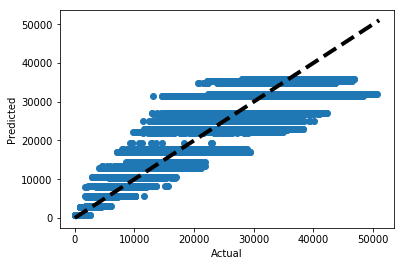

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()